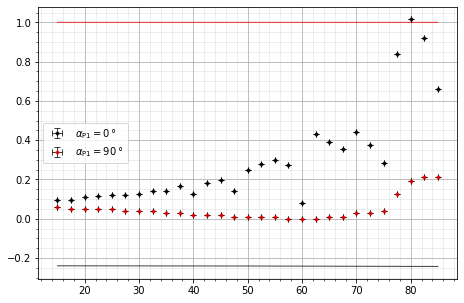

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V23.txt'

xo = np.loadtxt(input, float, usecols=0, skiprows=5, delimiter=',')
y0o = np.loadtxt(input, float, usecols=1, skiprows=5, delimiter=',')
y90o = np.loadtxt(input, float, usecols=2, skiprows=5, delimiter=',')
phi = np.loadtxt(input, float, usecols=3, skiprows=5, delimiter=',')

x = 90 - ( xo / 2 )
y0 = (y0o + 0.02)/2.305
y90 = (y90o + 0.02)/1.029

beta = np.arcsin(np.sin(x/360*2/np.pi)/1.63)

def y0theo(x):
    return -np.sin(x/360*2/np.pi-np.arcsin(np.sin(x/360*2/np.pi)/1.63))/np.sin(x/360*2/np.pi+np.arcsin(np.sin(x/360*2/np.pi)/1.63))

def y90theo(x):
    return -np.tan(x/360*2/np.pi-np.arcsin(np.sin(x/360*2/np.pi)/1.63))/np.tan(-x/360*2/np.pi+np.arcsin(np.sin(x/360*2/np.pi)/1.63))

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1_1 = np.linspace(min(x), max(x), 10000)

ax.set_xlabel(r'')
ax.set_ylabel(r'')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_1, y0theo(xplot_1_1), color = 'black', alpha = 0.75, linewidth = 1, label = '')
ax.plot(xplot_1_1, y90theo(xplot_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = '')
ax.errorbar(x, y0, xerr = 0, yerr = 0, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = r'$\alpha_\mathrm{P1}=0\,\degree$')
ax.errorbar(x, y90, xerr = 0, yerr = 0, fmt = '.', color = 'red', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = r'$\alpha_\mathrm{P1}=90\,\degree$')
ax.legend()
plt.savefig('', facecolor = 'white', bbox_inches='tight')
plt.show()